In [2]:
import numpy as np
import scipy as sp
import matplotlib.pylab as plt
from matplotlib.gridspec import GridSpec
from scipy.stats import norm
import scipy as sp
from scipy.integrate import odeint,quad,simps,trapezoid,cumtrapz
from scipy.special import eval_hermite,eval_hermitenorm,erfinv
from math import sqrt,sin,pi,cos,exp,log,factorial
from scipy.spatial import KDTree
from IPython.core.display import display, HTML
import sys
sys.path.append(r'/mnt/c/Users/Alejandro Lopez/Imperial College London/MSc Project - Alejandro López - MA - General/repository')
figures_route = r'/mnt/c/Users/Alejandro Lopez/Imperial College London/MSc Project - Alejandro López - MA - General/MSc Project - Latex/Figures/'
from nonparametric_generator import *
import tikzplotlib
import matplotlib
def pgf_switch(setting = 'off'):
    if setting == 'off':
        matplotlib.use('module://ipykernel.pylab.backend_inline')
        matplotlib.rcParams.update({
            "pgf.texsystem": "xelatex",
            'font.family': ['sans-serif'],
            'text.usetex': False,
            'pgf.rcfonts': True,
        })
    else:
        matplotlib.use("pgf")
        matplotlib.rcParams.update({
            "pgf.texsystem": "pdflatex",
            'font.family': 'serif',
            'text.usetex': True,
            'pgf.rcfonts': False,
        })
display(HTML("<style>.container { width:95% !important; }</style>"))

# Estimation of the operator $D^{-1}\mathcal{L}$

### Deterministic generation of points given the OU invariant distribution

$$x_i =F^{-1} (\bar{x}_i)$$

In [3]:
V = lambda x:  (5/6)*x**6 - (5/2)*x**4
DV = lambda x:  5*x**5 - 10*x**3
D = 1
Z = trapezoid(x = np.linspace(-10,10,2000),y = [np.exp(-V(x)/D) for x in np.linspace(-10,10,2000)])
rho_inf = lambda x : (1/Z) * np.exp(-V(x)/D)
x = np.linspace(-4,4,10000)
F = cumtrapz(x =x,y = rho_inf(x))

In [4]:
def DWSimulation(x0, n,dt,D):
    """
    Function to create the trayectory of a OU process
    with difussion paramter D 

    :param x0: Intial position
    :param n:  Number of steps
    "param dt: Step size
    :param D:  Difussion parameter

    :return X: Trajectory
    """
    t = np.linspace(x0,dt*n,n)
    X = np.zeros((n,1))
    noise = np.random.normal(loc=0,scale=np.sqrt(dt),size=(n,1))
    for i in range(1,n):
        x = X[i-1,:]
        X[i,:] = x -DV(x)*dt +sqrt(2*D) * noise[i,:]
    return(X)

In [6]:
N = 5000
x_bar = np.linspace(1e-10,1-1e-10,N)

In [8]:
X1 = np.zeros((N,1))
for i in range(N):
    X1[i] = (x[:-1][F>x_bar[i]])[0]
X_s1 = X1

In [10]:
x0 = 0
n = int(2e7)
dt = 1e-2
T = dt*n
D = 1
np.random.seed(1)
X2 = DWSimulation(x0,n,dt,D)

In [19]:
N = 10000
X_s2 = X2[np.random.choice(range(n),size=N),:]

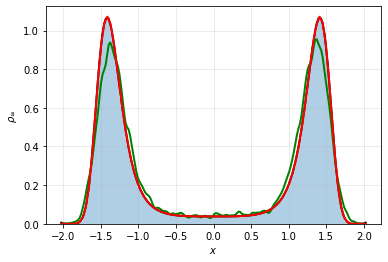

In [23]:
pgf_switch('off')
p_eq = density_estimation(X_s1, 0.01)
_ = plt.plot(np.linspace(min(X),max(X),200),[p_eq([x]) for x in np.linspace(min(X),max(X),200)],color='k',lw=2)
p_eq = density_estimation(X_s2, 0.02)
_ = plt.plot(np.linspace(min(X),max(X),200),[p_eq([x]) for x in np.linspace(min(X),max(X),200)],color='g',lw=2)
# _ = plt.plot(X,[(1/320)*q_0(x) for x in X[:,0]])
_ = plt.plot(np.linspace(min(X),max(X),100),[rho_inf(x) for x in np.linspace(min(X),max(X),100)],color='r',lw=2)
_ = plt.hist(X,density=True,alpha=0.35,bins=100)
_ = plt.grid(alpha=0.3)
_ = plt.xlabel('$x$')
_ = plt.ylabel('$\\rho_{\infty}$')

epsilon = 6.17e-06
d = 1.00


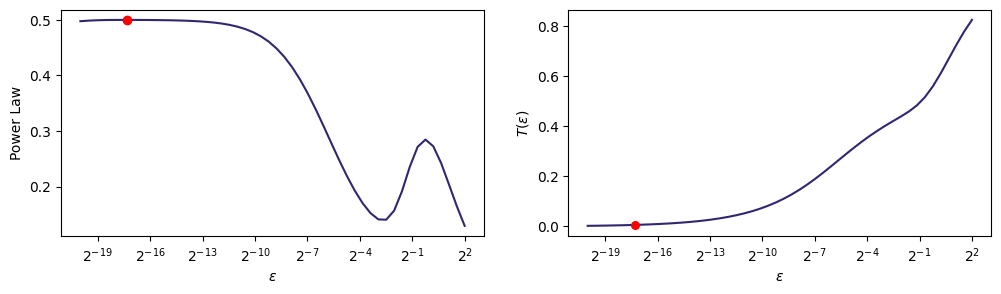

epsilon = 7.44e-05
d = 0.99


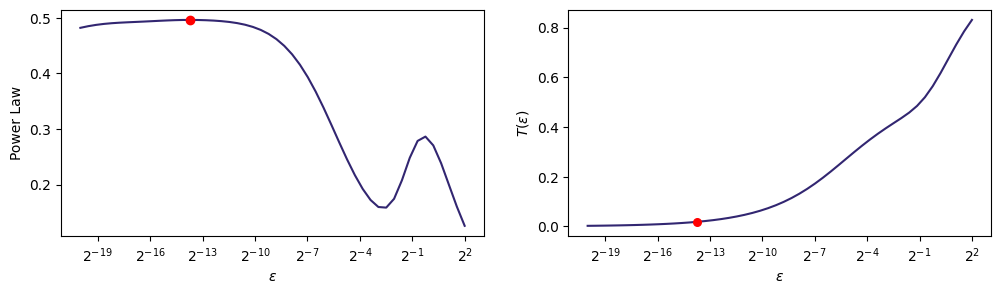

In [24]:
epsilon1, d1 = bandwidth_search(X_s1,plot=True,verbose=True)
epsilon2, d2 = bandwidth_search(X_s2,plot=True,verbose=True)

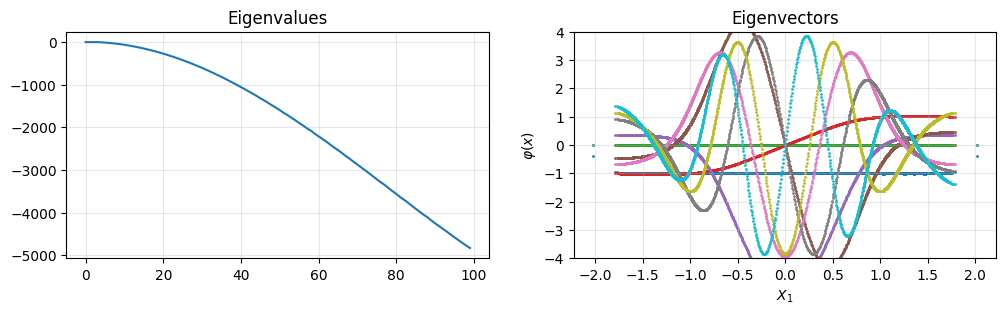

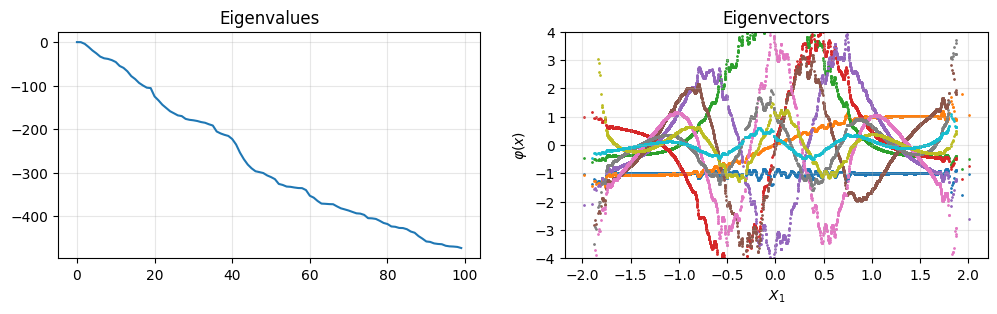

In [25]:
l1, phi1,L_e1, U1 = KNPGenerator(X_s1,M=100,plot=True,return_extra=True,epsilon=epsilon1,d=d1,epsilon_0=0.01)
phi_11 = np.linalg.pinv(phi1)

l2, phi2,L_e2, U2 = KNPGenerator(X_s2,M=100,plot=True,return_extra=True,epsilon=epsilon2,d=d2,epsilon_0=0.01)
phi_12 = np.linalg.pinv(phi2)

In [49]:
setting = 'on'
pgf_switch(setting)
plt.figure(figsize=(3,2))
plt.plot(l1,color='r',lw=1)
plt.plot(l2,color='b',lw=1)
plt.xlabel('$n$')
plt.ylabel('$\\lambda_n$')
plt.grid(alpha=0.2)
if setting == 'on':
    _ = plt.savefig(figures_route + '1dDWeigenvalues.pgf', bbox_inches='tight', pad_inches=0)
    _ = plt.close()

(-15.0, 15.0)

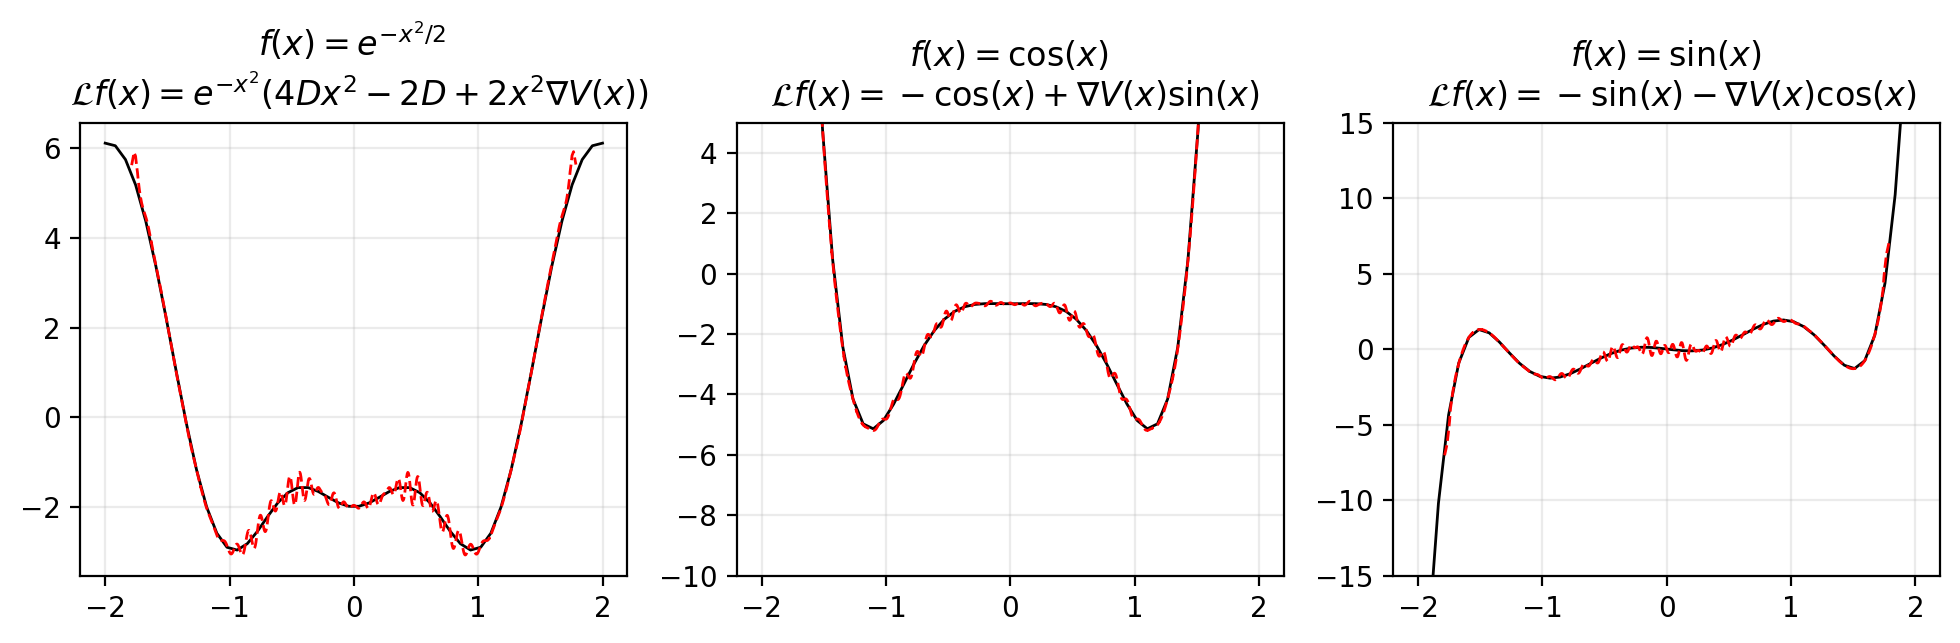

In [25]:
fig,axs = plt.subplots(1,3,figsize=(12,3),dpi=200)

x = np.linspace(-2,2)

Y = np.exp(-X_s[:,0]**2)
c_coef = D*(phi_1@Y)
axs[0].set_title("$f(x) =e^{-x^2/2} $ \n $\mathcal{L}f(x) = e^{-x^2}(4Dx^2-2D + 2x^2\\nabla V(x)) $")
axs[0].plot(x, D*np.exp(-x**2)*(4*x**2-2) + DV(x)*2*x*np.exp(-x**2),color='k',lw=1)
axs[0].plot(X_s[1:-1,:],np.sum((c_coef*l) * phi,axis=1)[1:-1],color='r',lw=1,ls='--')
# axs[0].scatter(X_s,D*L_e@Y,s=2,color='b',alpha=0.5)
axs[0].grid(alpha=0.25)

Y = np.cos(X_s[:,0])
c_coef =D*(phi_1@Y)
axs[1].set_title("$f(x) =\cos(x) $ \n $\mathcal{L}f(x) = -\cos(x)+\\nabla V(x)\sin(x) $")
axs[1].plot(x,-D*np.cos(x) + DV(x) * np.sin(x),color='k',lw=1)
axs[1].plot(X_s[1:-1,:],np.sum((c_coef*l) * phi,axis=1)[1:-1],color='r',lw=1,ls='--')
# axs[1].scatter(X_s,D*L_e@Y,s=2,color='b',alpha=0.5)
axs[1].grid(alpha=0.25)
axs[1].set_ylim(-10,5)

Y = np.sin(X_s[:,0])
c_coef = D*(phi_1@Y)
axs[2].set_title("$f(x) =\sin(x) $ \n $\mathcal{L}f(x) = -\sin(x)-\\nabla V(x)\cos(x) $")
axs[2].plot(x,-D*np.sin(x) - DV(x) * np.cos(x),color='k',lw=1)
axs[2].plot(X_s[1:-1,:],np.sum((c_coef*l) * phi,axis=1)[1:-1],color='r',lw=1,ls='--')
# axs[2].scatter(X_s,D*L_e@Y,s=2,color='b',alpha=0.5,label='Multiply the matrix')

axs[2].grid(alpha=0.25)
axs[2].set_ylim(-15,15)

In [54]:
setting = 'on'
pgf_switch(setting)
Y = X_s1[:,0]
c_coef11 = (D) * phi_11 @ Y
Y = X_s2[:,0]
c_coef12 = (D) * phi_12 @ Y

plt.figure(figsize=(3,2))
plt.plot(np.sort(X_s1,axis=0),np.sum((c_coef11*l1) * phi1,axis=1)[np.argsort(X_s1,axis=0)],color='r',lw=0.7,ls='--')
plt.plot(np.sort(X_s2,axis=0),np.sum((c_coef12*l2) * phi2,axis=1)[np.argsort(X_s2,axis=0)],color='b',lw=0.7,ls='--')
plt.plot(x, - DV(x) ,color='k',lw=0.5)
plt.grid(alpha=0.25)
plt.xlabel('$x$')
plt.ylabel("$V'(x)$")
plt.xlim(-1.8,1.8)
plt.ylim(-13,13)

if setting == 'on':
    _ = plt.savefig(figures_route + '1dDWtest.pgf', bbox_inches='tight', pad_inches=0)
    _ = plt.close()

# Push-forward of a initial density $p_0(x)$

### 1. Estimate the initial condition $c_i(0)$ as $$\hat{c}_i(0)=\frac{1}{N}\sum_{j=1}^N \frac{p_0(x_j)}{\hat{p}_{\text{eq}}(x_j)}\varphi_i(x_j) $$

In [55]:
p_0 = np.vectorize(lambda x: sp.stats.norm.pdf(x,0,1))
p_eq = density_estimation(X_s)
rho_eq = np.vectorize(lambda x: p_eq(x)[0])
c_0 = (1/len(X_s)) * np.sum(((p_0(X_s)/rho_eq(X_s))) * phi,axis=0)
init = 0
tf = 1
Nt = 100
tarray = np.linspace(0,tf,Nt)
csol = np.exp(tarray[:,None] * l[None,:] * D ) * c_0

NameError: name 'X_s' is not defined

### 3. Using $M$ modes estimate the density  as $$\hat{p}(x,t) =\hat{p}_{\text{eq}}(x) \sum_{i=0}^M \hat{c}_i(t)\varphi_i(x)$$

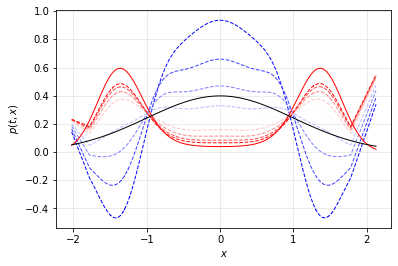

In [57]:
X_sort = np.sort(np.ravel(X_s))
N = len(X_s)
dx = np.diff(X_sort)
for t in np.arange(1,100,12):
    est_density = p_eq(X_s.T)* np.sum(phi * csol[t],axis=1)

    est_density=est_density[np.argsort(np.ravel(X_s))]
    cum = trapezoid(x=X_sort,y= est_density.T)
    plt.plot(X_sort,(1/cum) *est_density,lw=1,color=plt.cm.bwr(t/100),ls='--')
    
    
plt.plot(np.linspace(min(X_s),max(X_s),100),p_eq(np.linspace(min(X_s),max(X_s),100).T),
         color='r',lw=1)
plt.plot(np.linspace(min(X_s),max(X_s),100),p_0(np.linspace(min(X_s),max(X_s),100)),
         color='k',lw=1)
plt.xlabel('$x$')
plt.ylabel('$p(t,x)$')
plt.grid(alpha=0.3)

# Push-forward of obserbable $f(x)$


In [50]:
Lambda = np.diag(l)
D = 1
def RHS(y,t):
    return((D*Lambda) @ y)

init = 0
tf = 5
Nt = 100
tarray = np.linspace(0,tf,Nt)

csol = odeint(RHS,c_0,tarray,args=())

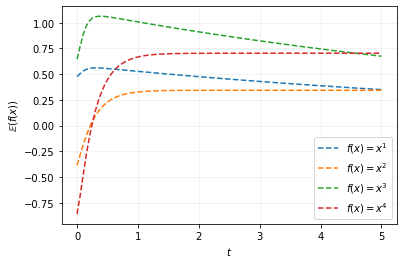

In [51]:
for p in [1,2,3,4]:
    N = len(X_s)
    f = X_s[:,0]**p
    a = (1/N)*(f @ phi)
    plt.plot(np.linspace(0,5,100),csol @ a,'--',label=f'$f(x) = x^{p}$')
plt.grid(alpha=0.2)
plt.xlabel('$t$')
plt.ylabel('$\mathbb{E}(f(x))$')
plt.legend()